In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [58]:
data = pd.read_csv("books1.csv")

In [59]:
print(data.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        652        2095690               27591   
1           eng        870  

In [60]:
data['title'] = data['title'].str.lower()
data['authors'] = data['authors'].str.lower()

In [61]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_title = tfidf_vectorizer.fit_transform(data['title'])
tfidf_matrix_authors = tfidf_vectorizer.fit_transform(data['authors'])

In [62]:
tfidf_matrix_combined = np.hstack([tfidf_matrix_title.toarray(), tfidf_matrix_authors.toarray()])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_combined, data['average_rating'], test_size=0.2, random_state=42)

In [64]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [65]:
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(X_train_svd, y_train)
y_pred_rf = regressor_rf.predict(X_test_svd)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
accuracy_rf = np.mean(np.abs(y_pred_rf - y_test) <= 0.5)

In [66]:
print("Random Forest Regression:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("Accuracy (within 0.5 stars):", accuracy_rf)

Random Forest Regression:
Mean Squared Error: 0.060096012288539856
Mean Absolute Error: 0.18913629142956964
Accuracy (within 0.5 stars): 0.9544025157232704


In [67]:
regressor_lr = LinearRegression()
regressor_lr.fit(X_train_svd, y_train)
y_pred_lr = regressor_lr.predict(X_test_svd)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
accuracy_lr = np.mean(np.abs(y_pred_lr - y_test) <= 0.5)

In [68]:
print("\nLinear Regression:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("Accuracy (within 0.5 stars):", accuracy_lr)


Linear Regression:
Mean Squared Error: 0.06168209542953942
Mean Absolute Error: 0.196853664257477
Accuracy (within 0.5 stars): 0.9528301886792453


In [69]:
regressor_svr = SVR()
regressor_svr.fit(X_train_svd, y_train)
y_pred_svr = regressor_svr.predict(X_test_svd)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
accuracy_svr = np.mean(np.abs(y_pred_svr - y_test) <= 0.5)

In [70]:
print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("Mean Absolute Error:", mae_svr)
print("Accuracy (within 0.5 stars):", accuracy_svr)


Support Vector Regression:
Mean Squared Error: 0.06023055033835936
Mean Absolute Error: 0.19337818759096678
Accuracy (within 0.5 stars): 0.9559748427672956


In [71]:
regressor_knn = KNeighborsRegressor()
regressor_knn.fit(X_train_svd, y_train)
y_pred_knn = regressor_knn.predict(X_test_svd)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
accuracy_knn = np.mean(np.abs(y_pred_knn - y_test) <= 0.5)

In [72]:
print("\nK-Nearest Neighbors Regression:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("Accuracy (within 0.5 stars):", accuracy_knn)


K-Nearest Neighbors Regression:
Mean Squared Error: 0.08828819496855346
Mean Absolute Error: 0.22864465408805032
Accuracy (within 0.5 stars): 0.9135220125786163


In [73]:
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression", "SVR", "KNN"],
    "Mean Squared Error": [mse_rf, mse_lr, mse_svr, mse_knn],
    "Mean Absolute Error": [mae_rf, mae_lr, mae_svr, mae_knn],
    "Accuracy": [accuracy_rf, accuracy_lr, accuracy_svr, accuracy_knn]
})

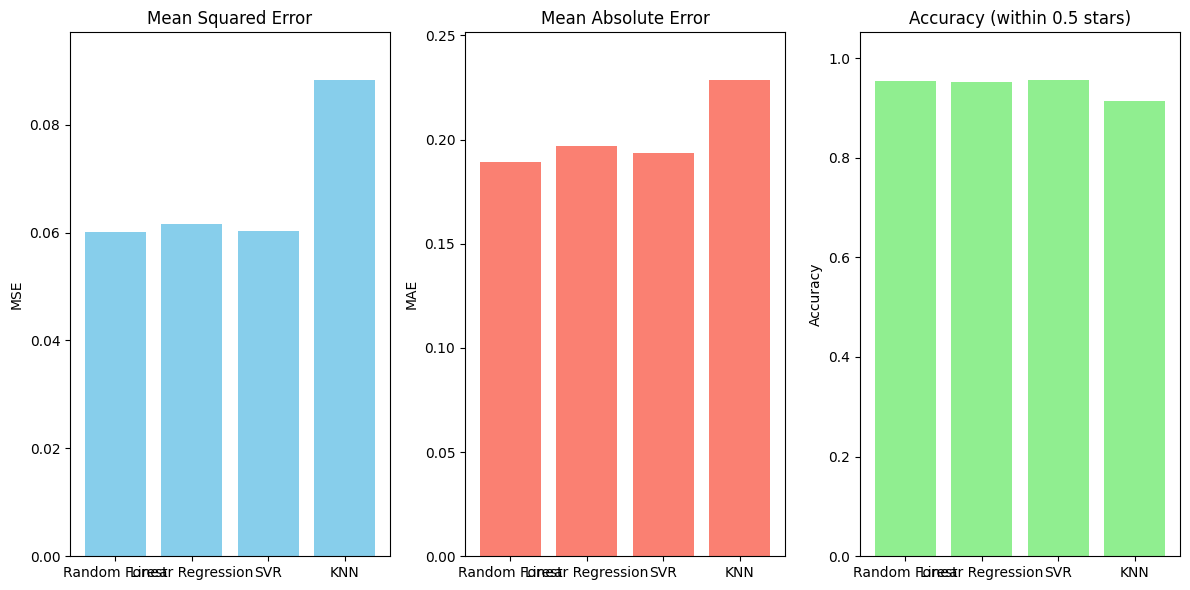

In [74]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(results_df["Model"], results_df["Mean Squared Error"], color='skyblue')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.ylim(0, max(results_df["Mean Squared Error"]) * 1.1)

plt.subplot(1, 3, 2)
plt.bar(results_df["Model"], results_df["Mean Absolute Error"], color='salmon')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.ylim(0, max(results_df["Mean Absolute Error"]) * 1.1)

plt.subplot(1, 3, 3)
plt.bar(results_df["Model"], results_df["Accuracy"], color='lightgreen')
plt.title('Accuracy (within 0.5 stars)')
plt.ylabel('Accuracy')
plt.ylim(0, max(results_df["Accuracy"]) * 1.1)

plt.tight_layout()
plt.show()